<a href="https://colab.research.google.com/github/Bloodflake/tensorflow-project/blob/master/Custom_linear_model_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.random.set_seed(1)

TensorFlow 2.x selected.


## A linear model f(x) = w*x + b

In [0]:
class Model():
  def __init__(self):
    self.w = tf.Variable(3.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self,x):
    return self.w*x + self.b

In [0]:
model = Model()

In [0]:
model.w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [0]:
model(3.0)

<tf.Tensor: id=20, shape=(), dtype=float32, numpy=9.0>

In [0]:
def loss(prediction,target):
  return tf.reduce_mean(tf.math.square(prediction - target))

In [0]:
TRUE_W = 5.0
TRUE_b = 10.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

Before training the model, visualize the loss value by plotting the model's predictions in red and the training data in blue:

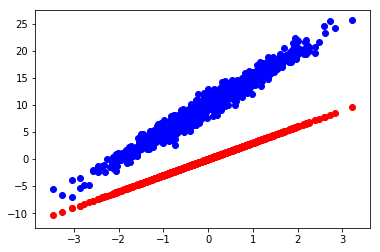

Current loss: 103.322281


In [0]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

### Define a training loop


In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as g:
    current_loss = loss(model(inputs),outputs)
    dw,db =  g.gradient(current_loss,[model.w,model.b])
    model.w.assign_sub(learning_rate*dw)
    model.b.assign_sub(learning_rate*db)

In [0]:
model = Model()
Ws = []
bs = []
train_epoch = 30
for epoch in range(train_epoch):
  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs),outputs)
  train(model,inputs,outputs,learning_rate=0.1)
  print(f"epoch {epoch} W : {Ws[-1]:.2f}  b : {bs[-1]:.2f} Loss: {current_loss:.3f}")

epoch 0 W : 3.00  b : 0.00 Loss: 103.322
epoch 1 W : 3.35  b : 1.98 Loss: 66.870
epoch 2 W : 3.63  b : 3.57 Loss: 43.413
epoch 3 W : 3.87  b : 4.84 Loss: 28.317
epoch 4 W : 4.07  b : 5.86 Loss: 18.600
epoch 5 W : 4.23  b : 6.68 Loss: 12.344
epoch 6 W : 4.37  b : 7.33 Loss: 8.316
epoch 7 W : 4.48  b : 7.86 Loss: 5.723
epoch 8 W : 4.57  b : 8.28 Loss: 4.053
epoch 9 W : 4.65  b : 8.61 Loss: 2.977
epoch 10 W : 4.71  b : 8.89 Loss: 2.284
epoch 11 W : 4.76  b : 9.10 Loss: 1.837
epoch 12 W : 4.80  b : 9.28 Loss: 1.550
epoch 13 W : 4.84  b : 9.41 Loss: 1.364
epoch 14 W : 4.86  b : 9.53 Loss: 1.245
epoch 15 W : 4.89  b : 9.62 Loss: 1.168
epoch 16 W : 4.91  b : 9.69 Loss: 1.118
epoch 17 W : 4.92  b : 9.75 Loss: 1.086
epoch 18 W : 4.93  b : 9.79 Loss: 1.065
epoch 19 W : 4.94  b : 9.83 Loss: 1.052
epoch 20 W : 4.95  b : 9.86 Loss: 1.044
epoch 21 W : 4.96  b : 9.88 Loss: 1.038
epoch 22 W : 4.96  b : 9.90 Loss: 1.035
epoch 23 W : 4.97  b : 9.92 Loss: 1.032
epoch 24 W : 4.97  b : 9.93 Loss: 1.031
epo

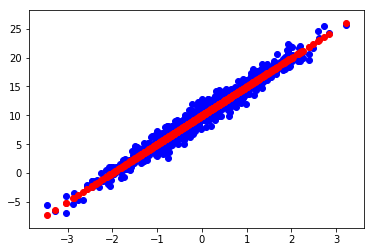

Current loss: 1.028236


In [0]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())